In [1]:
# Import des librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import scipy.stats as st
import statsmodels.api as sm

In [2]:
# Changer la taille de police par défaut
plt.rcParams.update({'font.size': 15})

In [3]:
pd.set_option('display.max_row', 3665)
pd.set_option('display.max_column', 70)
pd.set_option('display.column_space', 200)

In [4]:
# Info Pays
EdStatsCountry = pd.read_csv("EdStatsCountry.csv")
EdStatsCountry.set_index('Country Code', inplace=True)

# Affiche les noms explicites de la liste des 'Country Code' contenu dans 'list_pays' :
def ListCountryName(list_pays):
    for p in list_pays:
        print(EdStatsCountry.loc[p, 'Short Name'])

# Affiche le nom explicite du 'Country Code' contenu dans 'pays' :
def CountryName(pays):
    return(EdStatsCountry.loc[pays, 'Short Name'])

In [5]:
EdStatsCountry['Income Group'].unique()
# ['High income: nonOECD', 'Low income', 'Upper middle income', 'Lower middle income', 'High income: OECD']

EdStatsCountry['Region'].unique()
# [ 'North America', 'Latin America & Caribbean',  
#   'Europe & Central Asia', 'South Asia', 'East Asia & Pacific',
#   'Middle East & North Africa', 'Sub-Saharan Africa' ]


array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [6]:
# Association (Pays - Indicateur Code)
EdStatsData = pd.read_csv("EdStatsData.csv")
EdStatsData.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Selection des Zones Géographiques

In [7]:
all_country = EdStatsData['Country Name'].unique()   # Tous les pays =  Pays uniques + Groupements de pays

# 1ere version :
# group_pays  = ['Arab World', 'East Asia & Pacific', 'East Asia & Pacific (excluding high income)', 'Euro area',
#                'Europe & Central Asia', 'Europe & Central Asia (excluding high income)', 'European Union',
#                'Heavily indebted poor countries (HIPC)', 'High income', 'Latin America & Caribbean',
#                'Latin America & Caribbean (excluding high income)', 'Least developed countries: UN classification',
#                'Low & middle income', 'Low income', 'Lower middle income', 'Middle East & North Africa',
#                'Middle East & North Africa (excluding high income)', 'Middle income', 'North America', 'OECD members',
#                'South Asia', 'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)', 'Upper middle income', 'World']

# 2eme version :
# group_pays  = ['Arab World', 'East Asia & Pacific', 'East Asia & Pacific (excluding high income)', 
#                'Europe & Central Asia', 'Europe & Central Asia (excluding high income)', 'European Union',
#                'Latin America & Caribbean', 'Latin America & Caribbean (excluding high income)', 
#                'Middle East & North Africa', 'Middle East & North Africa (excluding high income)', 'North America',
#                'South Asia', 'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)']

# version retenue :
group_pays  = ['Arab World', 'East Asia & Pacific', 'Europe & Central Asia', 'European Union', 'Latin America & Caribbean',
               'Middle East & North Africa', 'North America', 'South Asia', 'Sub-Saharan Africa']

pays_a_garder = [x for x in all_country if x in group_pays]

EdStatsData = EdStatsData[EdStatsData['Country Name'].isin(pays_a_garder)]
EdStatsData.head(10)


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.365540,60.999962,61.922680,62.693420,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.041870,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.811760,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.245140,86.101669,85.511940,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,43.318150,44.640701,45.845718,46.449501,48.363892,50.046188,51.245281,52.242321,54.754372,56.486790,57.314659,58.226051,59.289230,60.748180,61.520870,62.734951,64.115883,65.099663,65.129204,65.827492,66.797028,63.260429,63.972111,67.033043,65.761559,68.780800,69.267052,70.435387,72.047287,73.275620,75.132980,76.641022,77.653580,78.485397,79.475769,79.608330,80.582420,81.473801,81.695686,82.871651,82.861389,84.401413,83.914032,83.820831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.658570,0.656400,0.663290,0.672040,0.672610,0.691760,0.699950,0.710140,0.718430,0.743740,0.759440,0.769250,0.779860,0.790710,0.799610,0.806770,0.816060,0.825130,0.834190,0.834760,0.844660,0.854320,0.826490,0.834080,0.859090,0.847310,0.872660,0.872690,0.884940,0.897370,0.904060,0.912750,0.919790,0.926300,0.927680,0.930840,0.929620,0.938460,0.942500,0.943470,0.947620,0.946700,0.962080,0.964090,0.966200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,65.826233,65.993584,67.301857,68.219078,69.059013,69.914551,71.499512,72.162064,72.717690,73.619972,74.379982,74.507133,74.662628,74.981827,75.972542,76.255493,76.875053,77.703857,78.039368,78.021889,77.933853,78.187492,76.541100,76.697418,78.028130,77.611900,78.817490,79.372040,79.593536,80.287529,81.051369,82.315048,83.324059,83.832

In [8]:
# Choix des indicateurs à priori intéressant
indic_to_keep = ['NY.GDP.MKTP.PP.CD', 'SP.POP.GROW', 'SP.POP.1524.TO.UN', 'SP.POP.TOTL', 'IT.NET.USER.P2', 'IT.CMP.PCMP.P2',
                 'UIS.NER.3', 'SE.TER.ENRR', 'LO.PISA.MAT', 'LO.PISA.REA', 'LO.PISA.SCI']

EdStatsData = EdStatsData[EdStatsData['Indicator Code'].isin(indic_to_keep)]
print("Taille EdStatsData:",len(EdStatsData))
EdStatsData.head(20)

Taille EdStatsData: 99


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
1249,Arab World,ARB,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.432608e+12,1.448128e+12,1.555509e+12,1.653814e+12,1.743415e+12,1.830441e+12,1.955731e+12,2.094466e+12,2.241567e+12,2.353191e+12,2.523213e+12,2.644195e+12,2.721095e+12,2.871734e+12,3.231080e+12,3.533460e+12,3.894657e+12,4.222431e+12,4.567157e+12,4.711255e+12,5.022945e+12,5.265230e+12,5.696577e+12,5.935614e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1339,Arab World,ARB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,5.897290e+00,5.890620e+00,6.169500e+00,6.531240e+00,6.933240e+00,7.477840e+00,8.135330e+00,8.775920e+00,9.215440e+00,9.260570e+00,9.604240e+00,1.018300e+01,1.055512e+01,1.073174e+01,1.101676e+01,1.102037e+01,1.134041e+01,1.139387e+01,1.145440e+01,1.111903e+01,1.117002e+01,1.089176e+01,1.149476e+01,1.238011e+01,1.298279e+01,1.381888e+01,1.479935e+01,1.572510e+01,1.652837e+01,1.791176e+01,1.816090e+01,1.876543e+01,1.956947e+01,1.955899e+01,2.069919e+01,2.173148e+01,2.219148e+01,2.273654e+01,2.343787e+01,2.409880e+01,2.476180e+01,2.427387e+01,2.577601e+01,2.733034e+01,2.817496e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,1.702505e-02,3.776069e-02,1.310456e-01,2.616151e-01,5.985821e-01,1.139541e+00,1.561288e+00,2.693061e+00,3.645881e+00,7.006812e+00,8.393142e+00,1.165465e+01,1.420590e+01,1.859353e+01,2.297369e+01,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1658,Arab World,ARB,"Net enrolment rate, upper secondary, both sexe...",UIS.NER.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2084,Arab World,ARB,Personal computers (per 100 people),IT.CMP.PCMP.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.379000e-01,8.181984e-01,9.500904e-01,1.147074e+00,1.406665e+00,1.707795e+00,1.887733e+00,2.414015e+00,2.517600e+00,3.401317e+00,3.979838e+00,5.305007e+00,6.676681e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2298,Arab World,ARB,PISA: Mean performance on the mathematics scale,LO.PISA.MAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2301,Arab World,ARB,PISA: Mean performance on the reading scale,LO.PISA.REA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2304,Arab World,ARB,PISA: Mean performance on the science scale,LO.PISA.SCI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

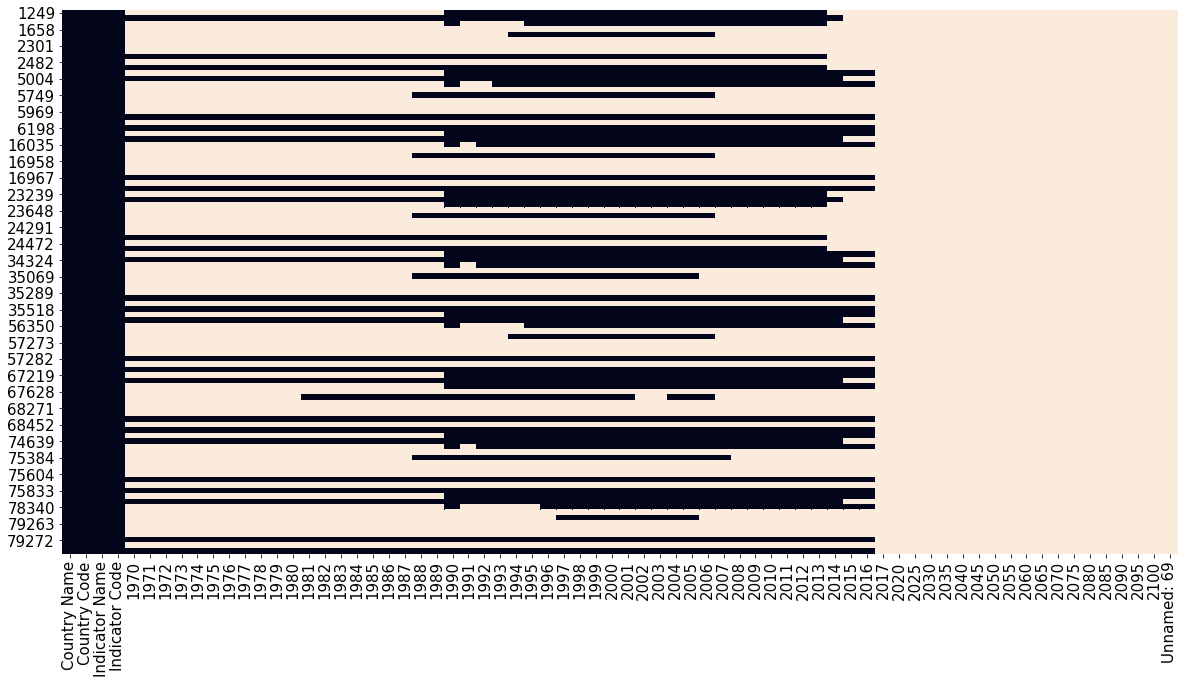

In [9]:
# Visualisation des valeurs manquantes tout indicateur confondu :

plt.figure(figsize=(20, 10))
sns.heatmap(EdStatsData.isna(), cbar=False)    # 'True' indiquant un NaN, est èquibvalent à 1, et donc apparaît en claire.

IT.CMP.PCMP.P2


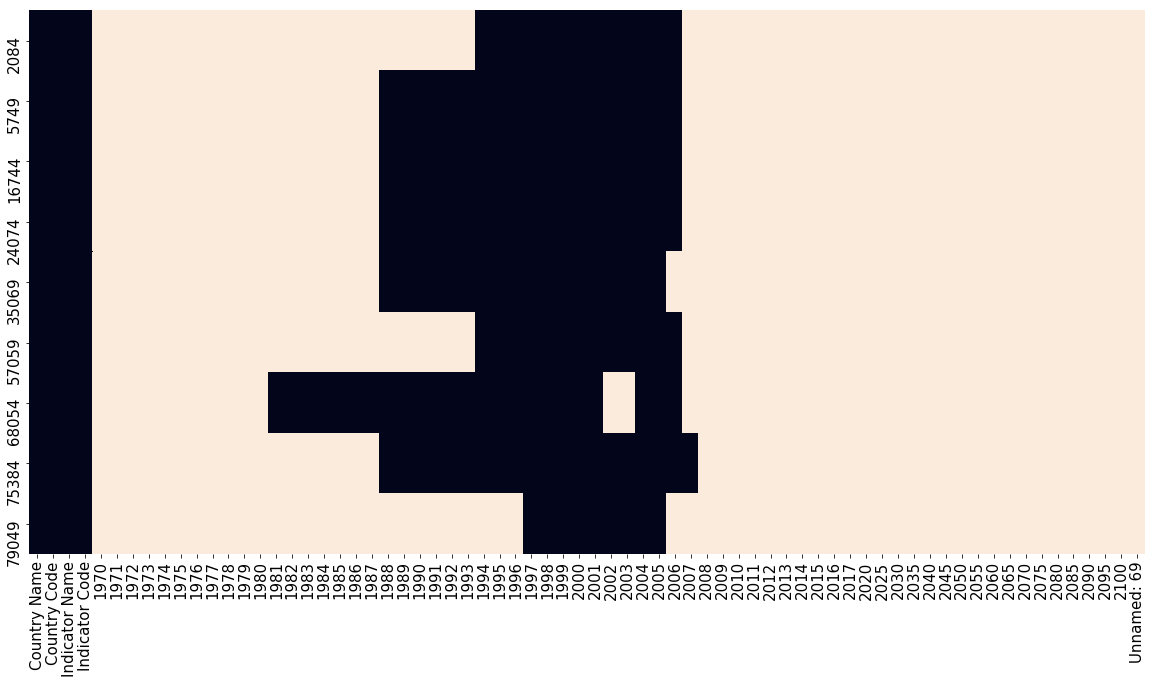

In [10]:
print("IT.CMP.PCMP.P2")
tt = EdStatsData.loc[EdStatsData['Indicator Code'] == 'IT.CMP.PCMP.P2']
plt.figure(figsize=(20, 10))
sns.heatmap(tt.isna(), cbar=False)

#  Constat :  'IT.CMP.PCMP.P2' est totalement absent à partir de 2008

LO.PISA.MAT


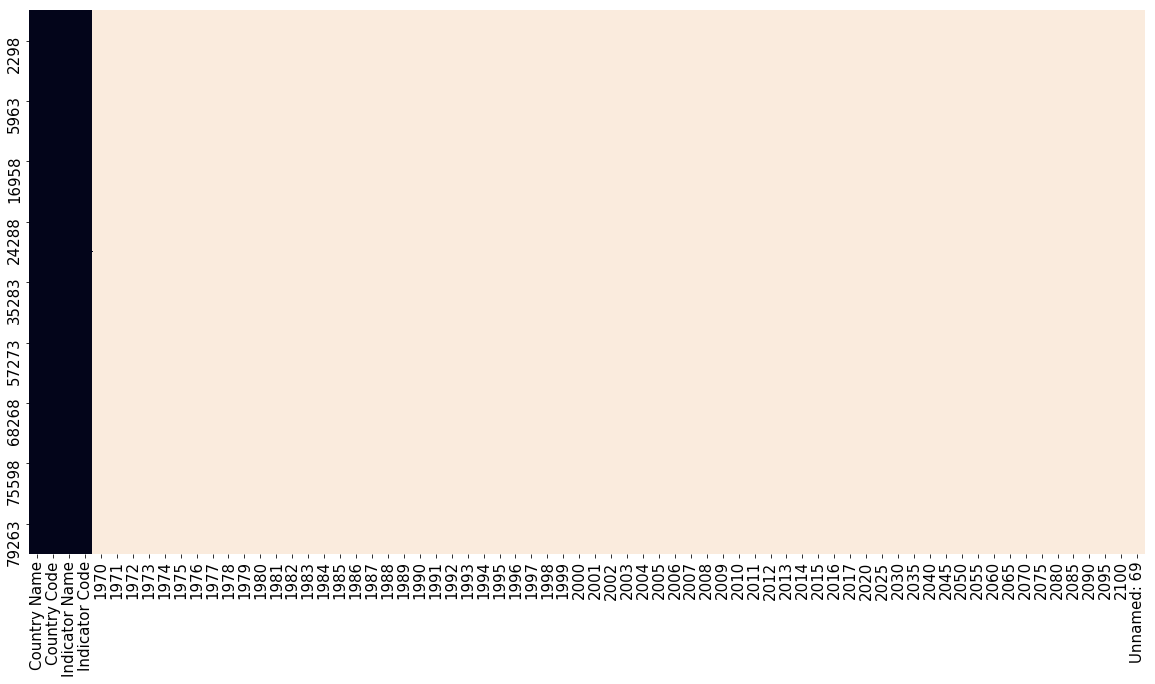

In [11]:
print("LO.PISA.MAT")
tt = EdStatsData.loc[EdStatsData['Indicator Code'] == 'LO.PISA.MAT']
plt.figure(figsize=(20, 10))
sns.heatmap(tt.isna(), cbar=False)

# absence de données
# Même constat pour 'LO.PISA.REA' & 'LO.PISA.SCI'

UIS.NER.3


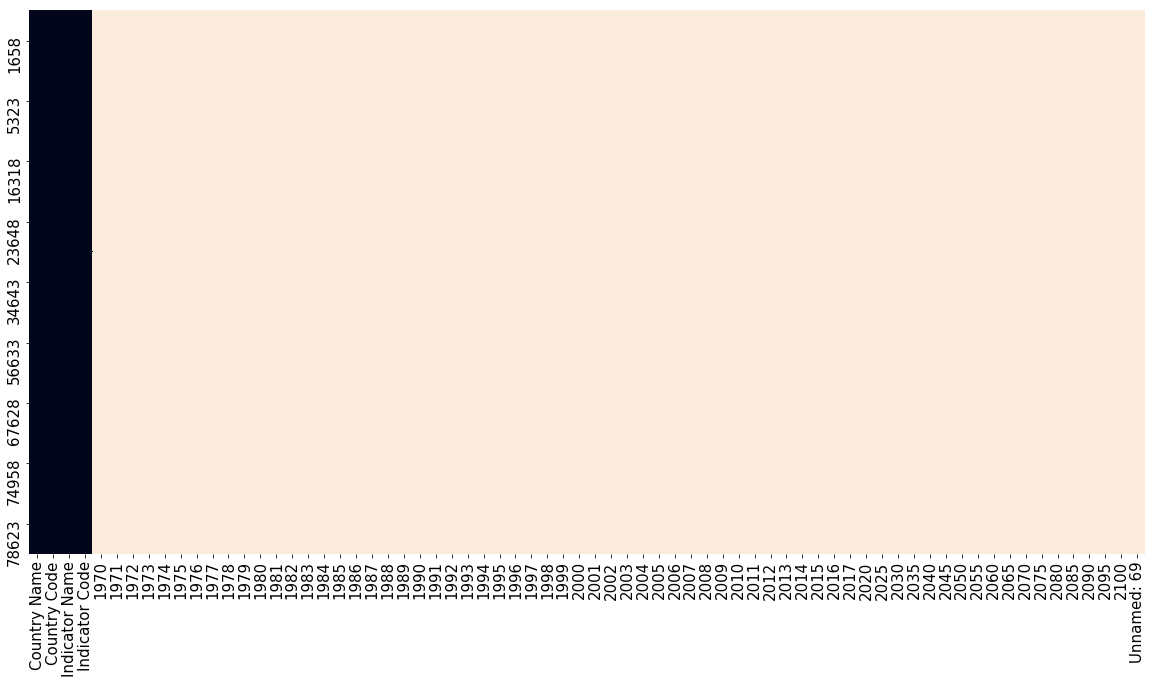

In [12]:
print("UIS.NER.3")
tt = EdStatsData.loc[EdStatsData['Indicator Code'] == 'UIS.NER.3']
plt.figure(figsize=(20, 10))
sns.heatmap(tt.isna(), cbar=False)

# absence de données

SE.TER.ENRR


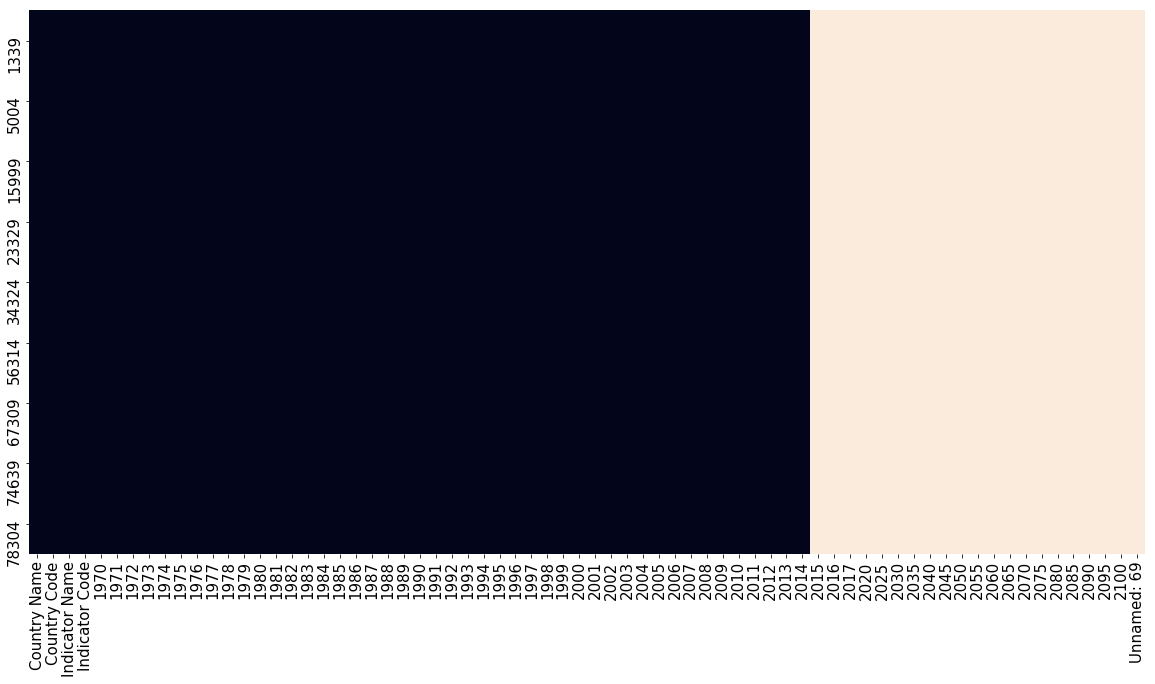

In [13]:
print("SE.TER.ENRR")
tt = EdStatsData.loc[EdStatsData['Indicator Code'] == 'SE.TER.ENRR']
plt.figure(figsize=(20, 10))
sns.heatmap(tt.isna(), cbar=False)

# Retenir 2014

NY.GDP.MKTP.PP.CD


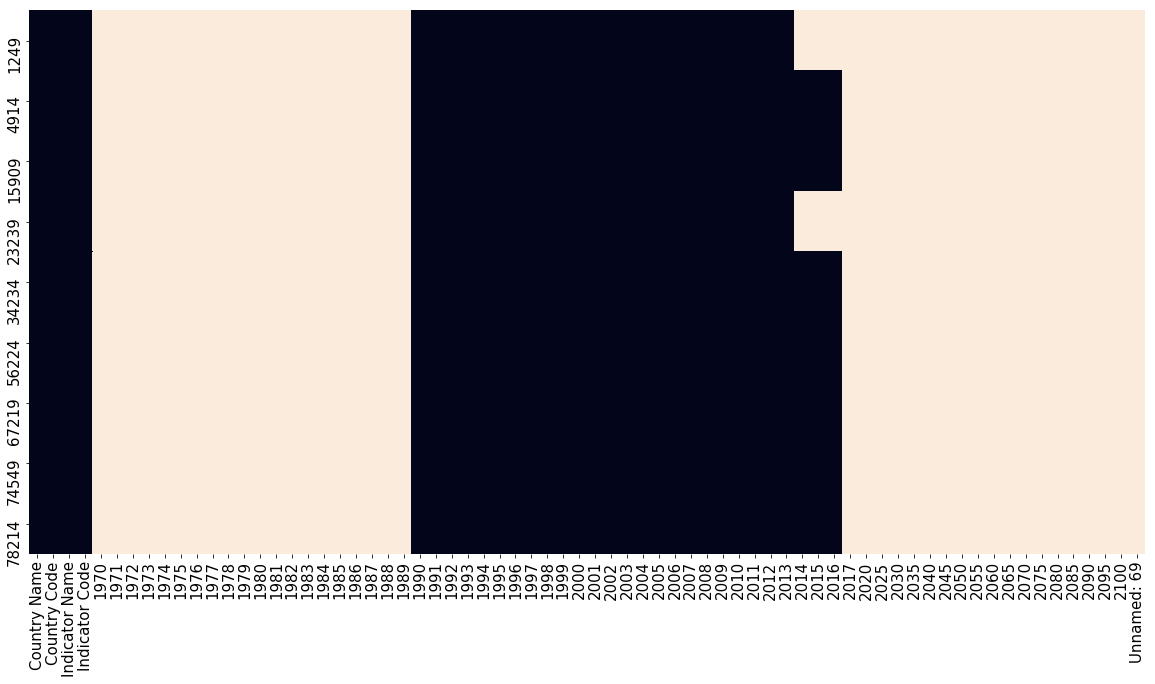

In [14]:
print("NY.GDP.MKTP.PP.CD")
tt = EdStatsData.loc[EdStatsData['Indicator Code'] == 'NY.GDP.MKTP.PP.CD']
plt.figure(figsize=(20, 10))
sns.heatmap(tt.isna(), cbar=False)

# Retenir 2014

SP.POP.1524.TO.UN


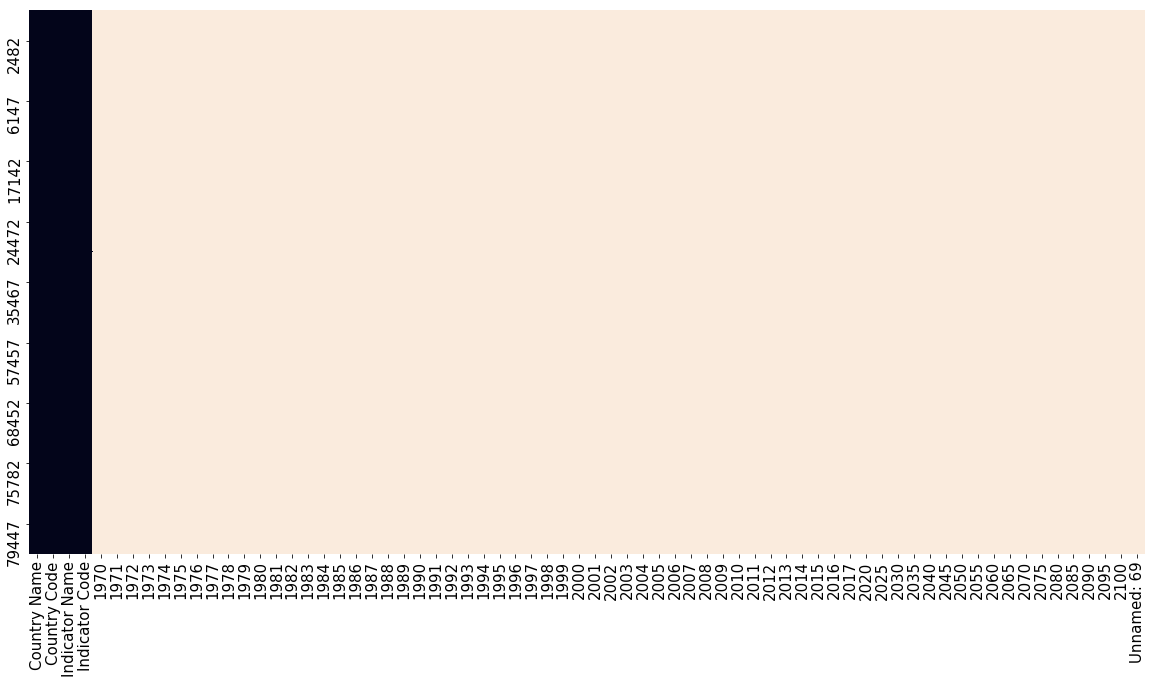

In [15]:
print("SP.POP.1524.TO.UN")
tt = EdStatsData.loc[EdStatsData['Indicator Code'] == 'SP.POP.1524.TO.UN']
plt.figure(figsize=(20, 10))
sns.heatmap(tt.isna(), cbar=False)

# absence de données

In [16]:
# CONCLUSION :   
# On passe de :
#  indic_to_keep = ['NY.GDP.MKTP.PP.CD', 'SP.POP.GROW', 'SP.POP.1524.TO.UN', 'SP.POP.TOTL', 'IT.NET.USER.P2', 'IT.CMP.PCMP.P2',
#                  'UIS.NER.3', 'SE.TER.ENRR', 'LO.PISA.MAT', 'LO.PISA.REA', 'LO.PISA.SCI']
#  à :
indic_to_keep = ['NY.GDP.MKTP.PP.CD', 'IT.NET.USER.P2', 'SE.TER.ENRR']

EdStatsData = EdStatsData[EdStatsData['Indicator Code'].isin(indic_to_keep)]
print("Taille EdStatsData:",len(EdStatsData))
EdStatsData.head(6)


Taille EdStatsData: 27


,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
1249,Arab World,ARB,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.432608e+12,1.448128e+12,1.555509e+12,1.653814e+12,1.743415e+12,1.830441e+12,1.955731e+12,2.094466e+12,2.241567e+12,2.353191e+12,2.523213e+12,2.644195e+12,2.721095e+12,2.871734e+12,3.231080e+12,3.533460e+12,3.894657e+12,4.222431e+12,4.567157e+12,4.711255e+12,5.022945e+12,5.265230e+12,5.696577e+12,5.935614e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1339,Arab World,ARB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,5.89729,5.89062,6.1695,6.53124,6.93324,7.47784,8.13533,8.77592,9.21544,9.26057,9.60424,10.18300,10.55512,10.73174,11.01676,11.02037,11.34041,11.39387,11.45440,11.11903,1.117002e+01,1.089176e+01,1.149476e+01,1.238011e+01,1.298279e+01,1.381888e+01,1.479935e+01,1.572510e+01,1.652837e+01,1.791176e+01,1.816090e+01,1.876543e+01,1.956947e+01,1.955899e+01,2.069919e+01,2.173148e+01,2.219148e+01,2.273654e+01,2.343787e+01,2.409880e+01,2.476180e+01,2.427387e+01,2.577601e+01,2.733034e+01,2.817496e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,1.702505e-02,3.776069e-02,1.310456e-01,2.616151e-01,5.985821e-01,1.139541e+00,1.561288e+00,2.693061e+00,3.645881e+00,7.006812e+00,8.393142e+00,1.165465e+01,1.420590e+01,1.859353e+01,2.297369e+01,2.674725e+01,2.970776e+01,3.401422e+01,3.686860e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4914,East Asia & Pacific,EAS,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.813347e+12,6.341998e+12,6.841580e+12,7.399677e+12,8.032464e+12,8.744926e+12,9.471338e+12,1.007480e+13,1.017907e+13,1.076709e+13,1.168383e+13,1.241555e+13,1.328841e+13,1.426921e+13,1.561846e+13,1.712663e+13,1.894129e+13,2.111184e+13,2.261927e+13,2.363590e+13,2.586023e+13,2.800591e+13,3.013837e+13,3.242281e+13,3.461161e+13,3.678985e+13,3.906746e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5004,East Asia & Pacific,EAS,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,3.15454,3.04716,3.1558,3.24345,3.51395,3.81330,4.09736,4.29319,4.65370,5.07132,5.37263,5.78282,6.22605,6.42761,6.74185,7.00248,7.18311,7.31894,7.21913,7.32832,7.390540e+00,7.548220e+00,7.698420e+00,8.431140e+00,9.424560e+00,1.035110e+01,1.126178e+01,1.238470e+01,1.319883e+01,1.434922e+01,1.548797e+01,1.706562e+01,1.900174e+01,2.082288e+01,2.233648e+01,2.331907e+01,2.402512e+01,2.446572e+01,2.498201e+01,2.639163e+01,2.777983e+01,2.903097e+01,3.109249e+01,3.330796e+01,3.914772e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5040,East Asia & Pacific,EAS,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.288276e-03,NaN,NaN,7.927792e-02,1.173821e-01,2.095779e-01,4.647337e-01,1.079850e+00,1.882787e+00,3.406408e+00,5.592680e+00,7.252166e+00,8.993588e+00,1.054724e+01,1.259696e+01,1.466636e+01,1.661783e+01,2.076652e+01,2.525357e+01,2.951320e+01,3.423084e+01,3.736516e+01,4.070935e+01,4.457735e+01,4.681210e+01,4.978792e+01,5.279632e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Année de référence

In [17]:
# Calcul du % de valeurs manquantes / colonne  (=>on divise par le nombre de lignes) :
(EdStatsData.isna().sum()/EdStatsData.shape[0]).sort_values(ascending=True)*100

# L'année  2014  offre le meilleur compromis Taux de données manquantes, contemporanéité

Country Name        0.000000
1997                0.000000
1998                0.000000
1999                0.000000
2001                0.000000
2002                0.000000
2003                0.000000
2004                0.000000
1996                0.000000
2005                0.000000
2007                0.000000
2008                0.000000
2009                0.000000
2010                0.000000
2011                0.000000
2012                0.000000
2013                0.000000
2006                0.000000
1990                0.000000
2000                0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
1995                3.703704
1994               11.111111
1993               11.111111
2014               14.814815
1992               14.814815
1991               25.925926
2016               48.148148
2015               48.148148
1973               66.666667
1972               66.666667
1986               66.666667
1985          

In [18]:
# Prise en compte de l'année de référence 2014

EdStatsData = EdStatsData[['Country Code', 'Indicator Code', '2014']]
EdStatsData.head(10)

,Country Code,Indicator Code,2014
1249,ARB,NY.GDP.MKTP.PP.CD,NaN
1339,ARB,SE.TER.ENRR,2.817496e+01
1375,ARB,IT.NET.USER.P2,NaN
4914,EAS,NY.GDP.MKTP.PP.CD,3.461161e+13
5004,EAS,SE.TER.ENRR,3.914772e+01
5040,EAS,IT.NET.USER.P2,4.681210e+01
15909,ECS,NY.GDP.MKTP.PP.CD,2.726515e+13
15999,ECS,SE.TER.ENRR,6.508073e+01
16035,ECS,IT.NET.USER.P2,6.894435e+01
23239,EUU,NY.GDP.MKTP.PP.CD,NaN


In [19]:
avantPivot = EdStatsData.copy()   # sauvegarde

In [19]:
EdStatsData = avantPivot.copy()   # restore

## Pivot

In [20]:
EdStatsData = EdStatsData.pivot_table(index= ["Country Code"],
                                      columns= ["Indicator Code"],
                                      values= ["2014"])

EdStatsData = EdStatsData.reset_index()
EdStatsData.head(30)

Country Code           2014                              
Indicator Code              IT.NET.USER.P2 NY.GDP.MKTP.PP.CD SE.TER.ENRR
0                       ARB            NaN               NaN   28.174959
1                       EAS      46.812103      3.461161e+13   39.147720
2                       ECS      68.944351      2.726515e+13   65.080727
3                       EUU            NaN               NaN   67.714767
4                       LCN      48.769199      9.607827e+12   44.664070
5                       MEA      40.138508      7.723357e+12   37.916130
6                       NAC      74.404815      1.899907e+13   84.032318
7                       SAS      19.070945      9.113826e+12   20.838640
8                       SSF      14.769942      3.582687e+12    8.593480

In [21]:
# Renommage des colonnes

EdStatsData.columns = ['Country', 'NET.USER', 'GDP', 'TER.ENROL']

EdStatsData.set_index('Country')
EdStatsData.head(30)

,Country,NET.USER,GDP,TER.ENROL
0,ARB,NaN,NaN,28.174959
1,EAS,46.812103,3.461161e+13,39.147720
2,ECS,68.944351,2.726515e+13,65.080727
3,EUU,NaN,NaN,67.714767
4,LCN,48.769199,9.607827e+12,44.664070
5,MEA,40.138508,7.723357e+12,37.916130
6,NAC,74.404815,1.899907e+13,84.032318
7,SAS,19.070945,9.113826e+12,20.838640
8,SSF,14.769942,3.582687e+12,8.593480


In [22]:
# Somme des valeurs manquantes par COLONNE(=indicator) ;       sum(axis=0) => Somme des NaN par colonne

print("Shape :", EdStatsData.shape)   # (241, 32) : Nombre de ligne et colonne
EdStatsData.isna().sum(axis=0)        # sum(axis=0) => Somme des NaN par colonne donc par indicator

# et en %  :
(EdStatsData.isna().sum(axis=0)/EdStatsData.shape[0]).sort_values(ascending=True)*100


Shape : (9, 4)


Country       0.000000
TER.ENROL     0.000000
NET.USER     22.222222
GDP          22.222222
dtype: float64

In [23]:
avantAnalyse = EdStatsData.copy()   # sauvegarde

In [24]:
EdStatsData = avantAnalyse.copy()   # restore

In [25]:
EdStatsData.describe()

,NET.USER,GDP,TER.ENROL
count,7.000000,7.000000e+00,9.000000
mean,44.701409,1.584336e+13,44.018090
std,22.600324,1.149703e+13,24.266417
min,14.769942,3.582687e+12,8.593480
25%,29.604726,8.418592e+12,28.174959
50%,46.812103,9.607827e+12,39.147720
75%,58.856775,2.313211e+13,65.080727
max,74.404815,3.461161e+13,84.032318


In [26]:
EdStatsData.median()

NET.USER     4.681210e+01
GDP          9.607827e+12
TER.ENROL    3.914772e+01
dtype: float64

## Passage au LOGARITHME

In [27]:
EdStatsData['GDP']       = np.log(EdStatsData['GDP'])
EdStatsData.describe()

,NET.USER,GDP,TER.ENROL
count,7.000000,7.000000,9.000000
mean,44.701409,30.143439,44.018090
std,22.600324,0.793929,24.266417
min,14.769942,28.907134,8.593480
25%,29.604726,29.758042,28.174959
50%,46.812103,29.893599,39.147720
75%,58.856775,30.756021,65.080727
max,74.404815,31.175210,84.032318


## Standardisation

In [28]:
indicators = ['NET.USER', 'GDP', 'TER.ENROL']

for col in indicators:  
    EdStatsData[col] = (EdStatsData[col] - EdStatsData[col].mean()) / EdStatsData[col].std()
EdStatsData.describe()

,NET.USER,GDP,TER.ENROL
count,7.000000e+00,7.000000e+00,9.000000e+00
mean,-1.268826e-16,4.472613e-15,2.220446e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.324382e+00,-1.557198e+00,-1.459820e+00
25%,-6.679852e-01,-4.854295e-01,-6.528830e-01
50%,9.339220e-02,-3.146873e-01,-2.007041e-01
75%,6.263346e-01,7.715835e-01,8.679747e-01
max,1.314291e+00,1.299577e+00,1.648955e+00


## Les meilleurs zones géographiques par critère

In [29]:
indicators = ['NET.USER', 'GDP', 'TER.ENROL']

net_user   = EdStatsData.sort_values(by = 'NET.USER', ascending=False)
gdp        = EdStatsData.sort_values(by = 'GDP', ascending=False)
ter_enrol  = EdStatsData.sort_values(by = 'TER.ENROL', ascending=False)


country1 = net_user.head(10)['Country'].unique()
country2 = gdp.head(10)['Country'].unique()
country3 = ter_enrol.head(10)['Country'].unique()

print("Pays les plus utilisateur internet:", country1)
print("Pays avec le meilleur gdp:", country2)
print("Pays avec le plus fort taux d'inscription:", country3)
print("\n")

# Quels pays retenir ?
ListCountryName(country1); print("\n")
ListCountryName(country2); print("\n")
ListCountryName(country3); print("\n")


# Asie Centrale :  Ouzbékistan, Kazakhstan, Kirghizistan, Tadjikistan, Turkménistan
# Asie Est :  Chine, Corée, Japon, Mongolie (parfois rattachée à l'Asie centrale), Taïwan, Viêt Nam, Singapour


Pays les plus utilisateur internet: ['NAC' 'ECS' 'LCN' 'EAS' 'MEA' 'SAS' 'SSF' 'ARB' 'EUU']
Pays avec le meilleur gdp: ['EAS' 'ECS' 'NAC' 'LCN' 'SAS' 'MEA' 'SSF' 'ARB' 'EUU']
Pays avec le plus fort taux d'inscription: ['NAC' 'EUU' 'ECS' 'LCN' 'EAS' 'MEA' 'ARB' 'SAS' 'SSF']


North America
Europe & Central Asia (all income levels)
Latin America & Caribbean (all income levels)
East Asia & Pacific (all income levels)
Middle East & North Africa (all income levels)
South Asia
Sub-Saharan Africa (all income levels)
Arab World
European Union


East Asia & Pacific (all income levels)
Europe & Central Asia (all income levels)
North America
Latin America & Caribbean (all income levels)
South Asia
Middle East & North Africa (all income levels)
Sub-Saharan Africa (all income levels)
Arab World
European Union


North America
European Union
Europe & Central Asia (all income levels)
Latin America & Caribbean (all income levels)
East Asia & Pacific (all income levels)
Middle East & North Africa (all i

## Fonction Score :  Classement des zones géographiques

In [30]:
# Calcul de la moyenne arithmétique des 5 variables pour détecter les 5 meilleurs pays :

EdStatsData['MOY'] = (EdStatsData['NET.USER'] + EdStatsData['GDP'] + EdStatsData['TER.ENROL'])/5
EdStatsData.sort_values(by = 'MOY', ascending=False)

MAX_BEST = 5

pays_moy = EdStatsData.sort_values(by = 'MOY', ascending=False)
pays_gagnant = pays_moy.head(MAX_BEST)['Country'].unique().tolist()
print("Classement :", pays_gagnant, "\n")
print(ListCountryName(pays_gagnant))
pays_moy.head(40)

# Remarque  :  C'est le score pour l'année 2014.  A vérifier pour un futur proche.

Classement : ['NAC', 'ECS', 'EAS', 'LCN', 'MEA'] 

North America
Europe & Central Asia (all income levels)
East Asia & Pacific (all income levels)
Latin America & Caribbean (all income levels)
Middle East & North Africa (all income levels)
None


,Country,NET.USER,GDP,TER.ENROL,MOY
6,NAC,1.314291,0.544095,1.648955,0.701468
2,ECS,1.072681,0.999072,0.867975,0.587946
1,EAS,0.093392,1.299577,-0.200704,0.238453
4,LCN,0.179988,-0.314687,0.026620,-0.021616
5,MEA,-0.201895,-0.589685,-0.251457,-0.208608
7,SAS,-1.134075,-0.381174,-0.955207,-0.494091
8,SSF,-1.324382,-1.557198,-1.459820,-0.868280
0,ARB,NaN,NaN,-0.652883,NaN
3,EUU,NaN,NaN,0.976521,NaN


In [31]:
# Rappel:  Pays au meilleur score : ['KOR', 'USA', 'DNK', 'FIN', 'DEU'] 

#   Korea
#   United States
#   Denmark
#   Finland
#   Germany


In [32]:
ListCountryName(['NAC', 'ECS', 'EAS', 'LCN', 'MEA', 'SAS', 'SSF'] )
# pays_moy.Country

North America
Europe & Central Asia (all income levels)
East Asia & Pacific (all income levels)
Latin America & Caribbean (all income levels)
Middle East & North Africa (all income levels)
South Asia
Sub-Saharan Africa (all income levels)


## Graphique radar des  Pays sélectionnés

In [33]:
# Calcul de l'échelle des valeurs affichées pour le graphique radar

from math import *

MAX_BEST = 5   # Nombre de meilleurs Pays à afficher
cinq_pays = pays_moy.head(MAX_BEST)
indicators = ['NET.USER', 'GDP', 'TER.ENROL']
min = 1000
max = -1000
echel_N = []
echel_A = []

for col in indicators:      
    if cinq_pays[col].min() < min:
        min = cinq_pays[col].min()
    if cinq_pays[col].max() > max:
        max = cinq_pays[col].max()
min = floor(min)    # conversion à l'entier inf
max = ceil(max)     # conversion à l'entier sup

# échelle numérique
echel_N = np.arange(min, max, (max-min)/5).tolist()
echel_N[-1] = ceil(echel_N[-1] + 1)                  # augmenter le dernier élément qui est exclus avec np.arange

# échelle alphabétique
[echel_A.append(str(elem)) for elem in echel_N]; print("")

In [34]:
from math import pi

df = pays_moy.head(MAX_BEST)
df = df.drop(['MOY'], 1)
df.reset_index(inplace=True)

categories=list(df)[2:]      # les indicateurs
N = len(categories)

# But we need to repeat the first value to close the circular graph:
values0 = df.loc[0].drop(['index','Country']).values.flatten().tolist()   # 1er pays
values1 = df.loc[1].drop(['index','Country']).values.flatten().tolist()   # ...
values2 = df.loc[2].drop(['index','Country']).values.flatten().tolist()   # ...
values3 = df.loc[3].drop(['index','Country']).values.flatten().tolist()   # ...
values4 = df.loc[4].drop(['index','Country']).values.flatten().tolist()   # 5eme pays
# Le 1er elt est repris pour clore le graphe circulaire:
values0 += values0[:1]                                                   # values[:1] <- la liste de 0 à 1, 1 non inclus
values1 += values1[:1]
values2 += values2[:1]
values3 += values3[:1]
values4 += values4[:1]

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]


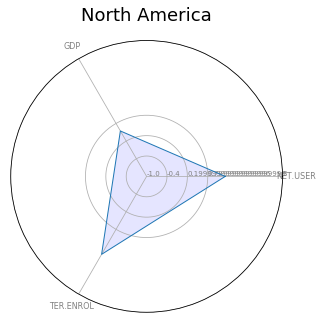

In [35]:
fig = plt.figure(figsize = (5, 5))   # largeur,hauteur

# Initialise the spider plot : trace le cercle
ax = plt.subplot(111, polar=True)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(echel_N, echel_A, color="grey", size=7)
# un cercle à l'ascisse des différents elts de echel_N, avec la legende echel_A

plt.ylim(echel_N[0], echel_N[-1])  # limites min et max
plt.title(CountryName(pays_gagnant[0]))

# Plot data : affiche des différentes valeurs contenues dans 'values'
ax.plot(angles, values0,  linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, values0, 'b', alpha=0.1)


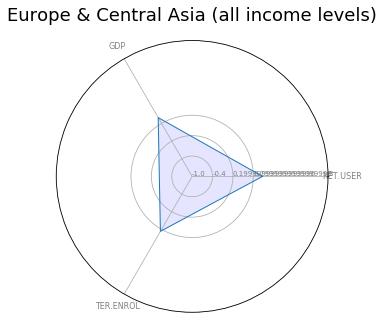

In [36]:
fig = plt.figure(figsize = (5, 5))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=8)
ax.set_rlabel_position(0)

plt.yticks(echel_N, echel_A, color="grey", size=7)
plt.ylim(echel_N[0], echel_N[-1])
plt.title(CountryName(pays_gagnant[1]))

ax.plot(angles, values1, linewidth=1, linestyle='solid')
ax.fill(angles, values1, 'b', alpha=0.1)

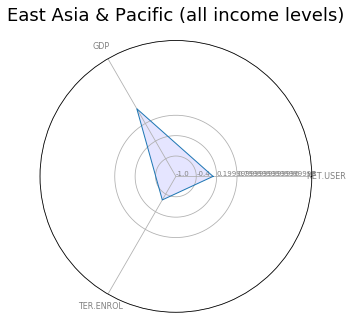

In [37]:
fig = plt.figure(figsize = (5, 5))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=8)
ax.set_rlabel_position(0)

plt.yticks(echel_N, echel_A, color="grey", size=7)
plt.ylim(echel_N[0], echel_N[-1])
plt.title(CountryName(pays_gagnant[2]))

ax.plot(angles, values2, linewidth=1, linestyle='solid')
ax.fill(angles, values2, 'b', alpha=0.1)

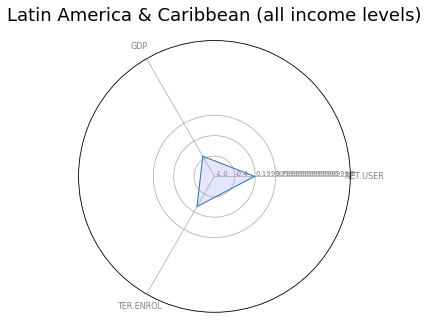

In [38]:
fig = plt.figure(figsize = (5, 5))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=8)
ax.set_rlabel_position(0)

plt.yticks(echel_N, echel_A, color="grey", size=7)
plt.ylim(echel_N[0], echel_N[-1])
plt.title(CountryName(pays_gagnant[3]))

ax.plot(angles, values3, linewidth=1, linestyle='solid')
ax.fill(angles, values3, 'b', alpha=0.1)

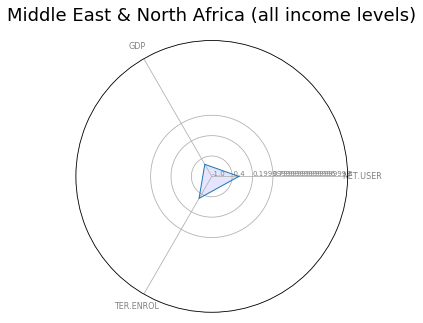

In [39]:
fig = plt.figure(figsize = (5, 5))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='grey', size=8)
ax.set_rlabel_position(0)

plt.yticks(echel_N, echel_A, color="grey", size=7)
plt.ylim(echel_N[0], echel_N[-1])
plt.title(CountryName(pays_gagnant[4]))

ax.plot(angles, values4, linewidth=1, linestyle='solid')
ax.fill(angles, values4, 'b', alpha=0.1)

## Evolution des Indicateurs sur la pèriode 1990-2015

In [40]:
# Calcul de la moyenne arithmétique en 2020 par extrapolation , pour voir si les 5 meilleurs pays confirment leur intérêt

EdStatsData = pd.read_csv("EdStatsData.csv")

EdStatsData = EdStatsData[EdStatsData['Country Code'].isin(pays_gagnant)]
print("Taille EdStatsData:",len(EdStatsData)) 

# 1ere version :  On choisit les indicators qui nous intéressent
indic_to_keep = ['NY.GDP.MKTP.PP.CD', 'IT.NET.USER.P2', 'SE.TER.ENRR']
EdStatsData = EdStatsData[EdStatsData['Indicator Code'].isin(indic_to_keep)]
print("Taille EdStatsData:",len(EdStatsData))

# On garde les colonnes des années qui vont de 1990 à 2016. On supprime les autres années :
EdStatsData = EdStatsData.drop(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
                                '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', 
                                '2017', '2020', '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', 
                                '2070', '2075', '2080', '2085', '2090', '2095', '2100', 'Unnamed: 69',
                                'Country Name', 'Indicator Name'], 1)
EdStatsData.head(8)

Taille EdStatsData: 18325
Taille EdStatsData: 15


,Country Code,Indicator Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
4914,EAS,NY.GDP.MKTP.PP.CD,5.813347e+12,6.341998e+12,6.841580e+12,7.399677e+12,8.032464e+12,8.744926e+12,9.471338e+12,1.007480e+13,1.017907e+13,1.076709e+13,1.168383e+13,1.241555e+13,1.328841e+13,1.426921e+13,1.561846e+13,1.712663e+13,1.894129e+13,2.111184e+13,2.261927e+13,2.363590e+13,2.586023e+13,2.800591e+13,3.013837e+13,3.242281e+13,3.461161e+13,3.678985e+13,3.906746e+13
5004,EAS,SE.TER.ENRR,7.390540e+00,7.548220e+00,7.698420e+00,8.431140e+00,9.424560e+00,1.035110e+01,1.126178e+01,1.238470e+01,1.319883e+01,1.434922e+01,1.548797e+01,1.706562e+01,1.900174e+01,2.082288e+01,2.233648e+01,2.331907e+01,2.402512e+01,2.446572e+01,2.498201e+01,2.639163e+01,2.777983e+01,2.903097e+01,3.109249e+01,3.330796e+01,3.914772e+01,NaN,NaN
5040,EAS,IT.NET.USER.P2,7.288276e-03,NaN,NaN,7.927792e-02,1.173821e-01,2.095779e-01,4.647337e-01,1.079850e+00,1.882787e+00,3.406408e+00,5.592680e+00,7.252166e+00,8.993588e+00,1.054724e+01,1.259696e+01,1.466636e+01,1.661783e+01,2.076652e+01,2.525357e+01,2.951320e+01,3.423084e+01,3.736516e+01,4.070935e+01,4.457735e+01,4.681210e+01,4.978792e+01,5.279632e+01
15909,ECS,NY.GDP.MKTP.PP.CD,9.734639e+12,1.002031e+13,1.008709e+13,1.018375e+13,1.039237e+13,1.081525e+13,1.122190e+13,1.173270e+13,1.217760e+13,1.267594e+13,1.366641e+13,1.440165e+13,1.509542e+13,1.570748e+13,1.673585e+13,1.768893e+13,1.963825e+13,2.109524e+13,2.263246e+13,2.210969e+13,2.314772e+13,2.474550e+13,2.548702e+13,2.650762e+13,2.726515e+13,2.782289e+13,2.842660e+13
15999,ECS,SE.TER.ENRR,3.239739e+01,3.314555e+01,3.374650e+01,3.466745e+01,3.616450e+01,3.707671e+01,3.848942e+01,4.018471e+01,4.123219e+01,4.313300e+01,4.506765e+01,4.767055e+01,5.019638e+01,5.274498e+01,5.400104e+01,5.573004e+01,5.714423e+01,5.805522e+01,5.881888e+01,5.993601e+01,6.145275e+01,6.256124e+01,6.339251e+01,6.447547e+01,6.508073e+01,NaN,NaN
16035,ECS,IT.NET.USER.P2,4.811639e-02,NaN,2.625904e-01,3.177732e-01,5.648669e-01,1.024013e+00,1.842912e+00,3.360348e+00,5.435922e+00,9.244020e+00,1.318415e+01,1.640557e+01,2.305752e+01,2.836337e+01,3.235909e+01,3.522693e+01,3.808349e+01,4.367438e+01,4.735904e+01,5.056604e+01,5.611912e+01,5.883463e+01,6.348625e+01,6.630667e+01,6.894435e+01,7.116200e+01,7.391475e+01
34234,LCN,NY.GDP.MKTP.PP.CD,2.592243e+12,2.787593e+12,2.946790e+12,3.287679e+12,3.517838e+12,3.607036e+12,3.791413e+12,4.058128e+12,4.194569e+12,4.278657e+12,4.537074e+12,4.670187e+12,4.754688e+12,4.942118e+12,5.389652e+12,5.851102e+12,6.419003e+12,6.970003e+12,7.403878e+12,7.375674e+12,7.924816e+12,8.522411e+12,8.907848e+12,9.306460e+12,9.607827e+12,9.684819e+12,9.813768e+12
34324,LCN,SE.TER.ENRR,1.677977e+01,1.706923e+01,1.690858e+01,1.671549e+01,1.682458e+01,1.871479e+01,1.772484e+01,1.995836e+01,2.014632e+01,2.235667e+01,2.264497e+01,2.429419e+01,2.610768e+01,2.781866e+01,2.913989e+01,3.072009e+01,3.305341e+01,3.532819e+01,3.840112e+01,3.952648e+01,4.051117e+01,4.277433e+01,4.374975e+01,4.450826e+01,4.466407e+01,NaN,NaN


## GDP

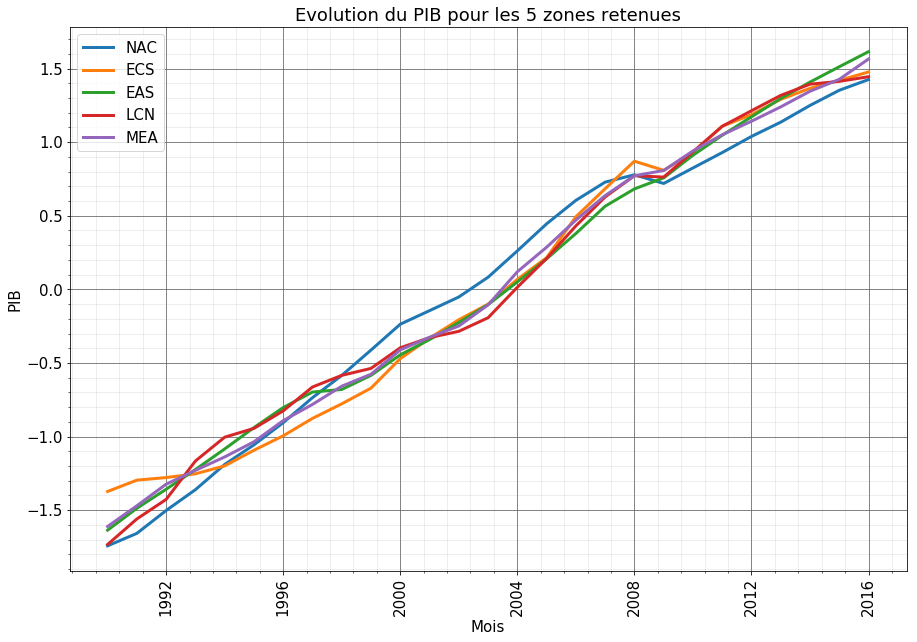

In [41]:
list_pays = EdStatsData["Country Code"].unique()

# Applique le LOG à toutes les lignes 'GDP' en excluant les 2 premières colonnes qui sont des caractères
gdp = EdStatsData.loc[EdStatsData["Indicator Code"] == 'NY.GDP.MKTP.PP.CD'].iloc[:,2:].apply(np.log, axis=1)   # OK

gdp.reset_index(inplace=True)
gdp['pays'] = pd.Series(list_pays)     # Ajout de la colonne 'pays'
gdp.set_index('pays', inplace=True)    # Le pays est la clé de chaque ligne
gdp = gdp.drop(['index'], 1)

# Standardisation 
for p in list_pays: 
    gdp.loc[p] = (gdp.loc[p] - gdp.loc[p].mean()) / gdp.loc[p].std()

# Série temporelle du GDP :
fig = plt.figure(figsize = (15, 10))
plt.title("Evolution du PIB pour les 5 zones retenues")
plt.xlabel("Mois")
plt.ylabel("PIB")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xticks(rotation=90)

for pays in pays_gagnant:
    ser_values = gdp.loc[pays]                              # on obtient un Series
    df_values = ser_values.to_frame()                       # convertit le Series en DataFrame
    df_values.columns = ['value']
    df_values = df_values.rename_axis('an').reset_index()   # les années forment la colonne 'an' mais plus un index
    df_values['an']  = pd.to_datetime(df_values['an'])      # conversion pour avoir une série temporelle
    
    plt.plot(df_values["an"], df_values["value"], label=pays, linewidth=3)
    plt.legend(loc = 'upper left')
    
plt.show()

## Taux brut de scolarisation, tertiaire

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


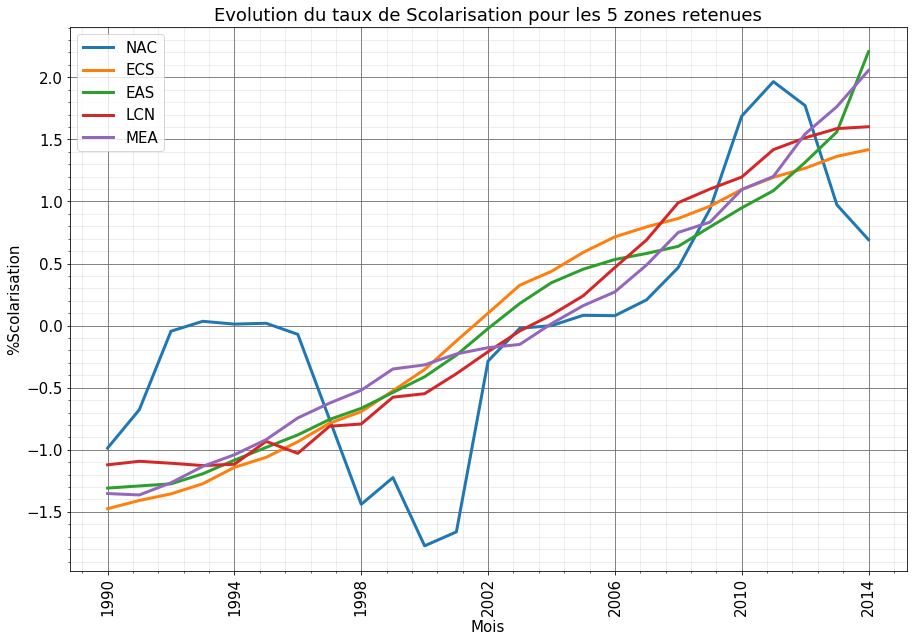

In [42]:
sco = EdStatsData.loc[(EdStatsData["Indicator Code"] == 'SE.TER.ENRR')]

list_pays = sco["Country Code"].unique()

sco.dropna(axis=1, how = 'all', inplace=True)   # supprime les colonnes ou il y a toutes les valeurs manquantes (ex: 2016)
sco = sco.drop(['Country Code','Indicator Code'], 1)
sco.reset_index(inplace=True)
sco['pays'] = pd.Series(list_pays)       # Ajout de la colonne 'pays'
sco = sco.drop(['index'], 1)
sco.set_index('pays', inplace=True)      # Le pays est la clé de chaque ligne

# Standardisation 
for p in list_pays: 
    sco.loc[p] = (sco.loc[p] - sco.loc[p].mean()) / sco.loc[p].std()

fig = plt.figure(figsize = (15, 10))
plt.title("Evolution du taux de Scolarisation pour les 5 zones retenues")
plt.xlabel("Mois")
plt.ylabel("%Scolarisation")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xticks(rotation=90)

for pays in pays_gagnant:
    ser_values = sco.loc[pays]    
    df_values = ser_values.to_frame()                        # convertit la série en DataFrame
    df_values.columns = ['value']
    df_values = df_values.rename_axis('an').reset_index()    # les années forment la colonne 'an' mais plus un index
    df_values['an']  = pd.to_datetime(df_values['an'])       # pour avoir une série temporelle
    
    plt.plot(df_values["an"], df_values["value"], label=pays, linewidth=3)
    plt.legend(loc = 'upper left')
    
plt.show()

## Usage internet

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


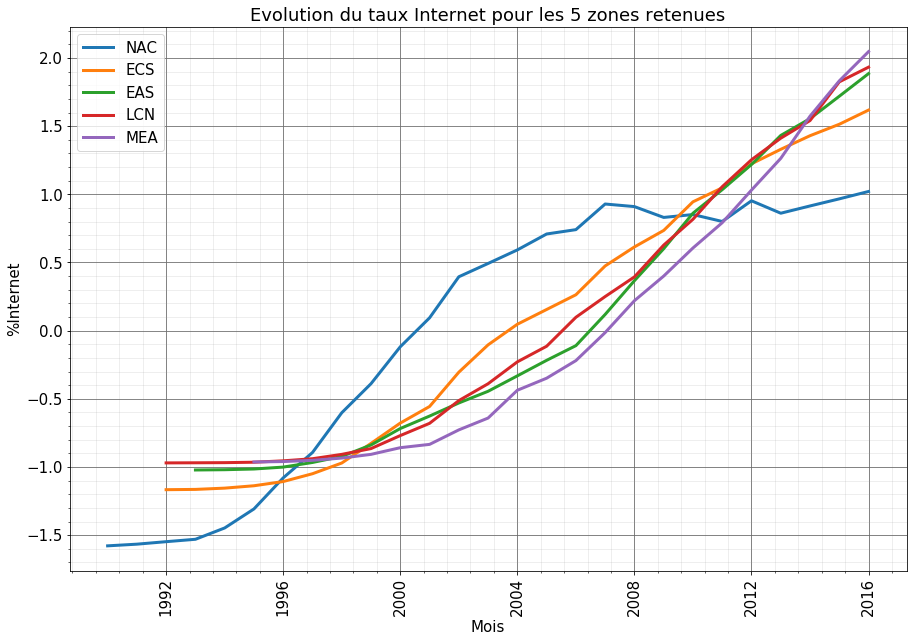

In [43]:
net = EdStatsData.loc[(EdStatsData["Indicator Code"] == 'IT.NET.USER.P2')]

list_pays = net["Country Code"].unique()

net.dropna(axis=1, how = 'all', inplace=True)   # supprime les colonnes ou il y a toutes les valeurs manquantes (ex: 2016)
net = net.drop(['Country Code','Indicator Code'], 1)
net.reset_index(inplace=True)
net['pays'] = pd.Series(list_pays)       # Ajout de la colonne 'pays'
net = net.drop(['index'], 1)
net.set_index('pays', inplace=True)      # Le pays est la clé de chaque ligne

# Standardisation 
for p in list_pays: 
    net.loc[p] = (net.loc[p] - net.loc[p].mean()) / net.loc[p].std()

fig = plt.figure(figsize = (15, 10))
plt.title("Evolution du taux Internet pour les 5 zones retenues")
plt.xlabel("Mois")
plt.ylabel("%Internet")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.xticks(rotation=90)

for pays in pays_gagnant:
    ser_values = net.loc[pays]    
    df_values = ser_values.to_frame()                        # convertit la série en DataFrame
    df_values.columns = ['value']
    df_values = df_values.rename_axis('an').reset_index()    # les années forment la colonne 'an' mais plus un index
    df_values['an']  = pd.to_datetime(df_values['an'])       # pour avoir une série temporelle
    
    plt.plot(df_values["an"], df_values["value"], label=pays, linewidth=3)
    plt.legend(loc = 'upper left')
    
plt.show()

## Prévision par Interpolation

In [44]:
# Création d'un dictionnaire pour recueillir les valeurs prédites de 2020 :

pays = gdp.index.tolist()

prev_2020 = {}   # Chaque pays a une entrée associée à une liste de valeur GDP, PISA ... pour l'année 2020.

for p in pays:
    prev_2020[p] = []

## Prévision GDP

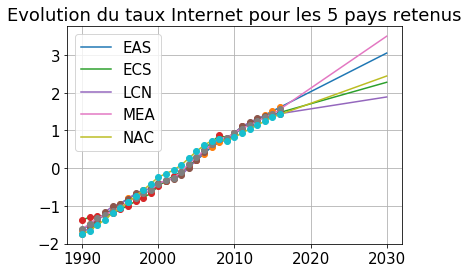

In [45]:
from scipy import interpolate

pays = gdp.index.tolist()

xp = gdp.columns.tolist()      # la pèriode de référence : une liste de '1990','1991', ...
xp = list(map(int, xp))        # liste d'entier
x = xp.copy()
x.extend([2017,2018,2019,2020,2030])   # extension de la pèriode à des fins de prévision

for p in pays:
    yp = gdp.loc[p].tolist()   # les valeurs de cette pèriode : list de float
    f = interpolate.interp1d(xp, yp, fill_value="extrapolate", kind="slinear")
    y = f(x)

    prev_2020[p].append(y[x.index(2020)])   # Ajout à la liste du pays en cours, la valeur prédite pour l'année '2020'

    plt.plot(x, y, label=p)
    plt.plot(xp, yp, "o")
    plt.title("Evolution du taux Internet pour les 5 pays retenus")

plt.legend(loc = 'upper left')
plt.grid(True)
plt.savefig( "evol_gdp.png", dpi=50 )
plt.show()

# l'extrapolation linéaire se fait avec l'option fill_value="extrapolate" . 
# En absence de ce paramètre, une valeur de x en dehors de l'intervalle des xp génère une erreur.
#
# kind :
#  "linear" : méthode par défaut ;
#  "nearest" : renvoie la valeur de yp correspondant au xp le plus proche ;
#  "zero" : fait une interpolation par une spline d'ordre 0 ;
#  "slinear" : " par une spline d'ordre 1 ;
#  "quadratic" : " par une spline d'ordre 2 ;
#  "cubic" : " par une spline d'ordre 3.

# plt.xticks(rotation = 'zero')  # étiquette verticale pour l'abcisse  KO

## PrévisionTaux brut de scolarisation, tertiaire

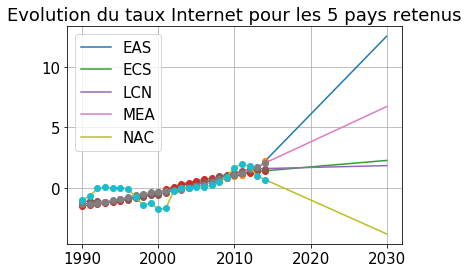

In [46]:
from scipy import interpolate

pays = sco.index.tolist()

xp = sco.columns.tolist()      # la pèriode de référence : une liste de '1990','1991', ...
xp = list(map(int, xp))        # liste d'entier
x = xp.copy()
x.extend([2017,2018,2019,2020,2030])   # extension de la pèriode à des fins de prévision

for p in pays:
    yp = sco.loc[p].tolist()   # les valeurs de cette pèriode : list de float
    f = interpolate.interp1d(xp, yp, fill_value="extrapolate", kind="slinear")
    y = f(x)                  

    prev_2020[p].append(y[x.index(2020)])   # Ajout à la liste du pays en cours la valeur prédite pour l'année '2020'

    plt.plot(x, y, label=p)
    plt.plot(xp, yp, "o")
    plt.title("Evolution du taux Internet pour les 5 pays retenus")

plt.legend(loc = 'upper left')
plt.grid(True)
plt.savefig( "evol_sco.png", dpi=50 )
plt.show()

## Prévision Usage internet

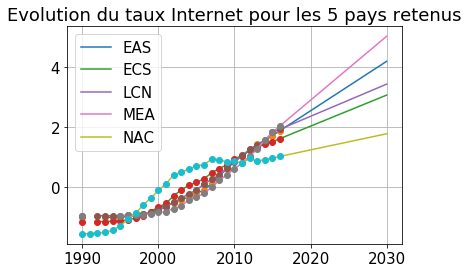

In [47]:
from scipy import interpolate

pays = net.index.tolist()

xp = net.columns.tolist()      # la pèriode de référence : une liste de '1990','1991', ...
xp = list(map(int, xp))        # liste d'entier
x = xp.copy()
x.extend([2017,2018,2019,2020,2030])   # extension de la pèriode à des fins de prévision

for p in pays:
    yp = net.loc[p].tolist()   # les valeurs de cette pèriode : list de float
    f = interpolate.interp1d(xp, yp, fill_value="extrapolate", kind="slinear")
    y = f(x)
    
    prev_2020[p].append(y[x.index(2020)])   # Ajout à la liste du pays en cours la valeur prédite pour l'année '2020'

    plt.plot(x, y, label=p)
    plt.plot(xp, yp, "o")
    plt.title("Evolution du taux Internet pour les 5 pays retenus")

plt.legend(loc = 'upper left')
plt.grid(True)
plt.savefig( "evol_net.png", dpi=50 )
plt.show()

## Resultats pour 2020

In [48]:
prev_2020

{'EAS': [2.0247320454731614, 6.084903743204576, 2.5487660350769215],
 'ECS': [1.70522386150751, 1.738389461204422, 2.034025306014118],
 'LCN': [1.5708593075048105, 1.6933334629023875, 2.363887344644538],
 'MEA': [2.116507423446932, 3.807449272104993, 2.903886131454234],
 'NAC': [1.715559318632896, -0.9944475481438095, 1.237298761511053]}

In [49]:
print("MOY 2020 :")
for p in pays:
    print(p,"la MOY= ", (sum(prev_2020[p])/5))
    

MOY 2020 :
EAS la MOY=  2.131680364750932
ECS la MOY=  1.0955277257452098
LCN la MOY=  1.1256160230103471
MEA la MOY=  1.7655685654012316
NAC la MOY=  0.3916821064000279


In [50]:
print("Classement 2020 :  EAP, EAS, ECA, ECS, NAC")

print("\n\nClassement 2014 :  NAC, ECS, EAS, LCN, MEA\n")
print("  North America")
print("  Europe & Central Asia (all income levels)")
print("  East Asia & Pacific (all income levels)")
print("  Latin America & Caribbean (all income levels)")
print("  Middle East & North Africa (all income levels)")

Classement 2020 :  EAP, EAS, ECA, ECS, NAC


Classement 2014 :  NAC, ECS, EAS, LCN, MEA

  North America
  Europe & Central Asia (all income levels)
  East Asia & Pacific (all income levels)
  Latin America & Caribbean (all income levels)
  Middle East & North Africa (all income levels)
